# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
import scipy.stats as st


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Building query url using base url and parameters

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
query_url


'http://api.openweathermap.org/data/2.5/weather?appid=f17856e4ce796d9d03022d7f22e4f88f&units=imperial&q='

In [4]:
# Create empty lists to store the data for each citi.

record_counter=0
set_counter=1
city_id_list = []
city_name_list = []
country_list = []
lon_list = []
lat_list = []
temp_list = []
max_temp_list = []
min_temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []
date_list = []

In [5]:
print("Beginning Data Retrieval ")
print("-----------------------------")

# Extracting weather details for each city and storing the values in list defined above
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_id_list.append(response["id"])
        city_name_list.append(response["name"])
        country_list.append(response["sys"]["country"])
        lon_list.append(response["coord"]["lon"])
        lat_list.append(response["coord"]["lat"])
        temp_list.append(response['main']['temp'])
        max_temp_list.append(response['main']['temp_max'])
        min_temp_list.append(response['main']['temp_min'])
        humidity_list.append(response["main"]["humidity"])
        clouds_list.append(response["clouds"]["all"])
        wind_speed_list.append(response["wind"]["speed"])
        date_list.append(response["dt"])
        
        if record_counter >= 50:
            record_counter = 0
            set_counter = set_counter + 1
    
        else:
            record_counter = record_counter + 1
            
        print(f"Processing Record {record_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print(f"{city} City not found in openweathermap. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")



Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : punta arenas
Processing Record 2 of Set 1 : yellowknife
illoqqortoormiut City not found in openweathermap. Skipping...
Processing Record 3 of Set 1 : port elizabeth
Processing Record 4 of Set 1 : mayumba
Processing Record 5 of Set 1 : aklavik
Processing Record 6 of Set 1 : bluff
Processing Record 7 of Set 1 : busselton
Processing Record 8 of Set 1 : new norfolk
Processing Record 9 of Set 1 : saint-philippe
Processing Record 10 of Set 1 : albany
Processing Record 11 of Set 1 : haines junction
Processing Record 12 of Set 1 : mogadishu
Processing Record 13 of Set 1 : rikitea
Processing Record 14 of Set 1 : nishihara
Processing Record 15 of Set 1 : tateyama
palabuhanratu City not found in openweathermap. Skipping...
Processing Record 16 of Set 1 : santa rosa de cabal
Processing Record 17 of Set 1 : vestmanna
Processing Record 18 of Set 1 : xianyang
Processing Record 19 of Set 1 : yarmouth
Processing Reco

Processing Record 20 of Set 4 : iranshahr
Processing Record 21 of Set 4 : butaritari
Processing Record 22 of Set 4 : sao filipe
attawapiskat City not found in openweathermap. Skipping...
Processing Record 23 of Set 4 : batagay-alyta
Processing Record 24 of Set 4 : quepos
Processing Record 25 of Set 4 : takoradi
toliary City not found in openweathermap. Skipping...
Processing Record 26 of Set 4 : kalmunai
Processing Record 27 of Set 4 : limoges
Processing Record 28 of Set 4 : severo-kurilsk
mys shmidta City not found in openweathermap. Skipping...
Processing Record 29 of Set 4 : faanui
Processing Record 30 of Set 4 : hami
Processing Record 31 of Set 4 : khilok
Processing Record 32 of Set 4 : nakhon phanom
Processing Record 33 of Set 4 : gaimersheim
Processing Record 34 of Set 4 : port lincoln
Processing Record 35 of Set 4 : port blair
Processing Record 36 of Set 4 : carnarvon
Processing Record 37 of Set 4 : anadyr
Processing Record 38 of Set 4 : itarema
Processing Record 39 of Set 4 : s

Processing Record 42 of Set 7 : beringovskiy
Processing Record 43 of Set 7 : ossora
Processing Record 44 of Set 7 : constitucion
tiruvottiyur City not found in openweathermap. Skipping...
Processing Record 45 of Set 7 : novomykolayivka
mrirt City not found in openweathermap. Skipping...
Processing Record 46 of Set 7 : baruun-urt
Processing Record 47 of Set 7 : kharp
Processing Record 48 of Set 7 : castro
Processing Record 49 of Set 7 : benguela
Processing Record 50 of Set 7 : umm kaddadah
Processing Record 0 of Set 8 : jian
el faiyum City not found in openweathermap. Skipping...
Processing Record 1 of Set 8 : telenesti
Processing Record 2 of Set 8 : saurimo
Processing Record 3 of Set 8 : ko samui
Processing Record 4 of Set 8 : rawson
Processing Record 5 of Set 8 : bilma
Processing Record 6 of Set 8 : swellendam
Processing Record 7 of Set 8 : chara
Processing Record 8 of Set 8 : sajanan
Processing Record 9 of Set 8 : hualmay
Processing Record 10 of Set 8 : batemans bay
Processing Record

Processing Record 18 of Set 11 : sebezh
Processing Record 19 of Set 11 : nagua
Processing Record 20 of Set 11 : laguna
Processing Record 21 of Set 11 : caranavi
Processing Record 22 of Set 11 : veraval
Processing Record 23 of Set 11 : kangaatsiaq
Processing Record 24 of Set 11 : xuddur
Processing Record 25 of Set 11 : hailey
Processing Record 26 of Set 11 : iisalmi
Processing Record 27 of Set 11 : keuruu
Processing Record 28 of Set 11 : mareeba
Processing Record 29 of Set 11 : bad sachsa
Processing Record 30 of Set 11 : rusera
Processing Record 31 of Set 11 : salumbar
Processing Record 32 of Set 11 : antigonish
Processing Record 33 of Set 11 : saint-augustin
Processing Record 34 of Set 11 : hailar
-----------------------------
Data Retrieval Complete


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Create a dictornary to convert the list into data frame
city_weather_df = pd.DataFrame({
    "City":city_name_list,
    "Lat":lat_list,
    "Lng":lon_list,
    "Max Temp":max_temp_list,
    "Humidity":humidity_list,
    "Cloudiness":clouds_list,
    "Wind Speed":wind_speed_list,
    "Country":country_list,
    "Date":date_list
})

#Display the DataFrame
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,44.71,76,0,9.22,CL,1628127683
1,Yellowknife,62.4560,-114.3525,55.92,58,90,9.22,CA,1628127458
2,Port Elizabeth,-33.9180,25.5701,61.09,94,40,8.05,ZA,1628127290
3,Mayumba,-3.4320,10.6554,71.65,91,69,4.05,GA,1628127531
4,Aklavik,68.2191,-135.0107,68.83,35,0,11.99,CA,1628127683


In [7]:
#Export the city data into a .csv
city_weather_df.to_csv("../output_data/city_weather.csv",header=True)

In [8]:
summary_stats = city_weather_df.describe(include = "all")
summary_stats_humidity = city_weather_df["Humidity"].describe(include = "all")
summary_stats_humidity 

count    544.000000
mean      70.126838
std       21.327243
min        9.000000
25%       59.000000
50%       75.000000
75%       87.000000
max      100.000000
Name: Humidity, dtype: float64

In [9]:
summary_stats

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
count,544,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544,5.440000e+02
unique,544,NaN,NaN,NaN,NaN,NaN,NaN,113,NaN
top,Khanbari,NaN,NaN,NaN,NaN,NaN,NaN,RU,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,65,NaN
mean,NaN,19.870162,19.394594,69.666158,70.126838,54.056985,7.420607,NaN,1.628128e+09
std,NaN,32.854297,87.143829,13.205536,21.327243,40.024698,5.451201,NaN,1.119166e+02
min,NaN,-54.800000,-175.200000,31.950000,9.000000,0.000000,0.000000,NaN,1.628127e+09
25%,NaN,-7.971400,-53.668975,58.642500,59.000000,10.000000,3.492500,NaN,1.628128e+09
50%,NaN,22.426100,21.744100,70.420000,75.000000,62.500000,6.005000,NaN,1.628128e+09
75%,NaN,47.651825,93.975000,80.562500,87.000000,98.000000,9.972500,NaN,1.628128e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
print("Summary statics shows that the maximum value for humidity is 100% for all cities")

Summary statics shows that the maximum value for humidity is 100% for all cities


In [11]:
#  Get the indices of cities that have humidity over 100%.


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The plot shows the relationship between Latitude and Temperature.
The plot shows that as the latitude increases, the temperature goes down, and the temperature is hotter near the equator.
*Ignoring some of the outliers between the latitude range of 20-40

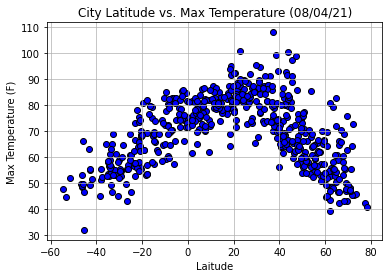

In [13]:
#cordinates
x_values = city_weather_df["Lat"]
y_values = city_weather_df["Max Temp"]

#plot
plt.scatter(x_values, y_values, facecolor ="Blue", edgecolor ="Black")

# Set title
plt.title("City Latitude vs. Max Temperature (08/04/21)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.7)

# Save the plotted figure as .pngs
plt.savefig("../Images/City_Latitude_Max_Temperature_RC.png")

## Latitude vs. Humidity Plot

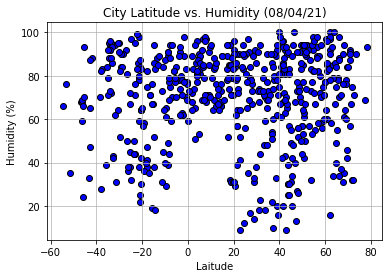

In [14]:
#cordinates
x_values = city_weather_df["Lat"]
y_values = city_weather_df["Humidity"]

#plot
plt.scatter(x_values, y_values, facecolor ="Blue", edgecolor ="Black")

# Set title
plt.title("City Latitude vs. Humidity (08/04/21)")


# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.7)

# Save the plotted figure as .pngs
plt.savefig("../Images/City_Latitude_Humidity_RC.png")

## Latitude vs. Cloudiness Plot

There is no clear correlation between latitude and cloudiness. Cloudiness is widely spread out.


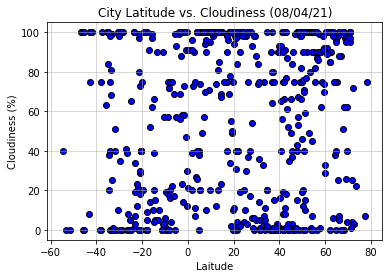

In [15]:
#cordinates
x_values = city_weather_df["Lat"]
y_values = city_weather_df["Cloudiness"]

#plot
plt.scatter(x_values, y_values, facecolor ="Blue", edgecolor ="Black")

# Set title
plt.title("City Latitude vs. Cloudiness (08/04/21)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City_Latitude_Cloudiness_RC.png")

## Latitude vs. Wind Speed Plot

Most of the wind speed values are below 20 mph, with only a few values above that wind speed limit.

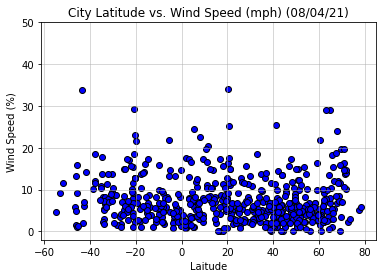

In [16]:
#cordinates
x_values = city_weather_df["Lat"]
y_values = city_weather_df["Wind Speed"]

#plot
plt.scatter(x_values, y_values, facecolor ="Blue", edgecolor ="Black")

# Set title
plt.title("City Latitude vs. Wind Speed (mph) (08/04/21)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City_Latitude_Wind Speed.png")

## Linear Regression

In [49]:
# Northern and Southern Hemisphere DataFrames
northern_hemisphere = city_weather_df.loc[city_weather_df["Lat"] >= 0]
southern_hemisphere = city_weather_df.loc[city_weather_df["Lat"] < 0]


In [50]:
# Define function for creating linear regression and scatter plot
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_equation


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Strong negative correlation between latitude and max temperature for northern hemisphere

The r-squared is : -0.66


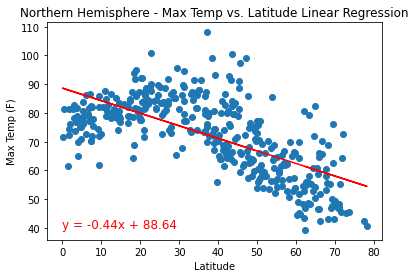

In [51]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]

# Call  linear_regression function
equation = linear_regression(x_values,y_values)

#Display Linear equation
plt.annotate(equation,(0,40),fontsize=12,color="red")

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression_RC.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.75


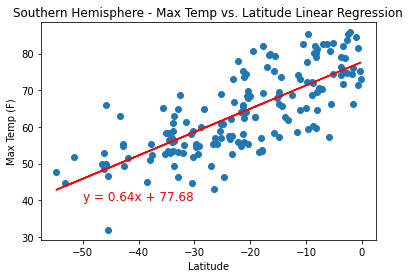

In [52]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]

# Call linear_regression function
equation = linear_regression(x_values,y_values)

#Display Linear equation
plt.annotate(equation,(-50,40),fontsize=12,color="red")

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression_RC.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.06


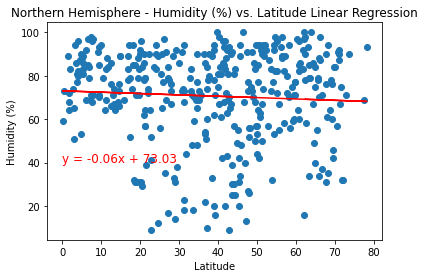

In [53]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

# Call  linear_regression function
equation = linear_regression(x_values,y_values)

#Display Linear equation
plt.annotate(equation,(0,40),fontsize=12,color="red")

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression_RC.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.06


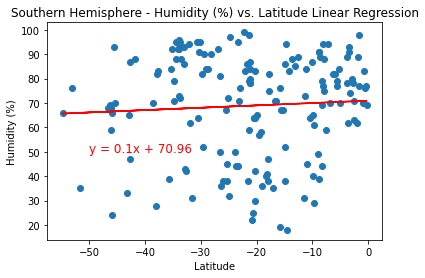

In [54]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

# Call  linear_regression function
equation = linear_regression(x_values,y_values)

#Display Linear equation
plt.annotate(equation,(-50,50),fontsize=12,color="red")

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression_RC.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.03


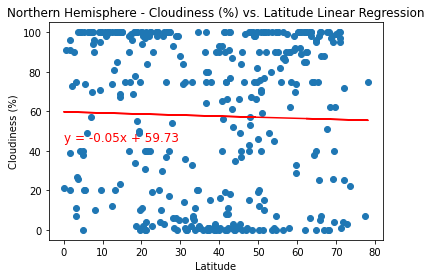

In [55]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]

# Call  linear_regression function
equation = linear_regression(x_values,y_values)

#Display Linear equation
plt.annotate(equation,(0,45),fontsize=12,color="red")

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression_RC.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.06


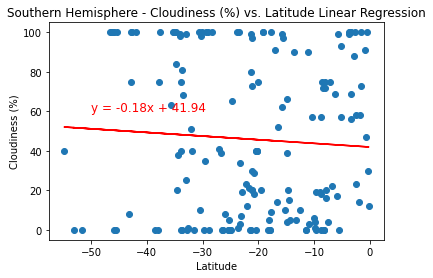

In [56]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]

# Call  linear_regression function
equation = linear_regression(x_values,y_values)

#Display Linear equation
plt.annotate(equation,(-50,60),fontsize=12,color="red")

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression_RC.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.0


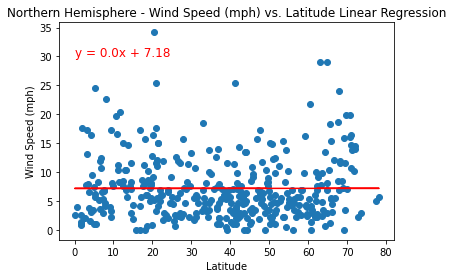

In [57]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

# Call  linear_regression function
equation = linear_regression(x_values,y_values)

#Display Linear equation
plt.annotate(equation,(0,30),fontsize=12,color="red")

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression_RC.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.15


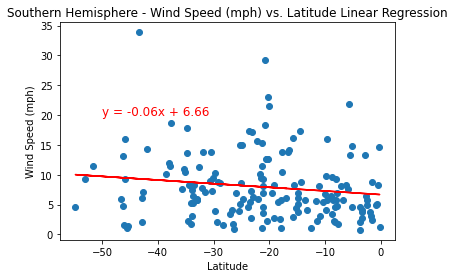

In [58]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

# Call  linear_regression function
equation = linear_regression(x_values,y_values)

#Display Linear equation
plt.annotate(equation,(-50,20),fontsize=12,color="red")

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression_RC.png")